## 0. 문제상황(시나리오)

'반도체 공정 이상 탐지' 프로젝트 팀은 반도체 제조의 복잡한 프로세스에 대한 새로운 프로젝트를 맡게 되었습니다. 이 프로젝트는 센서와 설비에서
수집된 다양한 신호와 변수들을 세심하게 모니터링하는 일로부터 시작됩니다. 이 신호들이 모두 동일한 중요성을 가지는 것은 아니라는 점이 현업이
요구한 내용의 핵심이며 우리 팀이 풀어가야하는 핵심문제입니다.

우리가 분석할 데이터는 유용한 정보, 관련 없는 정보, 그리고 잡음이 혼합된 복잡합니다. 우리에게는 실제로 필요한 것보다 많은 신호들이 주어져 있으며,
일반적으로 엔지니어들은 각각의 신호 유형을 하나의 독특한 특성으로 보고 접근합니다. Feature Engineering(특성 선택 기법)을 적용하여,
우리는 가장 관련성 높은 신호들을 선별해 내며, 이러한 신호들을 활용해 공정에서 발생할 수 있는 수율 이탈의 주요 원인들을 파악하려 합니다.

이 과정은 공정의 효율성을 향상시키고, 생산 비용을 절감할 수 있는 다양한 인사이트를 제공할 수 있을 것이라 기대됩니다. 이 신호들은 또한
반도체의 생산의 Pass/Fail 을 예측하는 데 사용될 수 있는 귀중한 특성으로 활용됩니다. 다양한 특성 조합을 탐색하고 실험함으로써,
우리는 수율 유형에 중대한 영향을 미치는 핵심 신호들을 식별할 수 있습니다.

정리하자면 우리 팀의 목표는 바로 반도체 공정 프로세스의 합격/불합격 수율을 예측할 수 있는 가장 의미 있는 신호를 찾아내고,
반도체 제조 과정의 품질과 효율성을 한 단계 끌어올리는 것입니다.

## **1. 목표(가설) 설정**

* 문제정의:
  - 현상: 센서 데이터를 통해 반도체 공정에서 발생할 수 있는 수율 이탈의 주요 원인들을 파악
  - 리스크: 반도체 공정 프로세스의 품질 하락 및 고객 신뢰상실 현상 발생
* 분석목표:
  -  반도체 공정 프로세스의 합격/불합격 수율이 예측가능한 모델 개발
* 우선순위:
  - 로지스틱 모델과 랜덤포레스트 모델을 통해 중요 변수 파악
  - 모델을 통해 찾은 가장 관련성있는 신호들을 관리 시스템 도입
* 데이터분석:
  - 데이터 전처리 과정을 완료한 후 두 가지 모델을 통해 데이터 분석
* 분석도구: Python
* 기대효과:
  - 반도체 제조과정의 품질을 기존보다 20% 이상 향상 가능
  - 신규고객 증가 비율이 30%이며 증가로 인한 수익은 5억 예상

## **2. 데이터 선정 및 분석**

### **1) 데이터 수집**

* 데이터 명세 ⬇

|Column|Description|
|:---|:---|
|Time|측정시간|
|0~589|센서 데이터 Value|
|Pass/Fail|불량여부 (-1:불량, 1:양품)|

### **2) EDA (탐색적 데이터 분석) 및 데이터 정제 실시**

In [1]:
!pip install pandas

In [2]:
# 데이터 분석에 필요한 pandas, numpy, matploylib, seaborn 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

/Users/yunjh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/yunjh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [78]:
df = pd.read_csv('uci-secom.csv')
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [79]:
# Data shape 확인
# 1567개의 행과, 592개의 열로 구성되어 있음.
print('df:',df.shape)

df: (1567, 592)


In [80]:
# Data Type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [81]:
# Target 변수 타입 확인
df['Pass/Fail'].dtypes

dtype('int64')

In [82]:
# feature engineering을 위한 추가 패키지 설치
!pip install feature_engine

In [83]:
pip install --upgrade numpy feature_engine

  Using cached numpy-1.26.4-cp39-cp39-macosx_10_9_x86_64.whl (20.6 MB)
Note: you may need to restart the kernel to use updated packages.


In [84]:
# Constnat(상수) : 일정한 값을 가지는 정보량이 없는 변수
def constant_column_ratio(df):
    
    constant_columns = 0
    total_columns = df.shape[1]  # 총 컬럼 수

    for column in df.columns:
        if df[column].nunique() == 1:  # 컬럼 내 고유값의 수가 1인 경우
            constant_columns += 1

    ratio = constant_columns / total_columns

    return total_columns, constant_columns, ratio

constant_column_ratio(df)

(592, 116, 0.19594594594594594)

In [85]:
from feature_engine.selection import DropConstantFeatures, SmartCorrelatedSelection
print("before:", len(df.columns))
df = DropConstantFeatures(missing_values='ignore').fit_transform(df)
print("after:", len(df.columns))

before: 592
after: 476


In [86]:
# Null값/Constant(상수) 값 확인 (※ 빈 값의 Data)
pd.set_option('display.max_rows',2000)
print(df.isnull().sum())

Time            0
0               6
1               7
2              14
3              14
4              14
6              14
7               9
8               2
9               2
10              2
11              2
12              2
14              3
15              3
16              3
17              3
18              3
19             10
20              0
21              2
22              2
23              2
24              2
25              2
26              2
27              2
28              2
29              2
30              2
31              2
32              1
33              1
34              1
35              1
36              1
37              1
38              1
39              1
40             24
41             24
43              1
44              1
45              1
46              1
47              1
48              1
50              1
51              1
53              4
54              4
55              4
56              4
57              4
58              4
59        

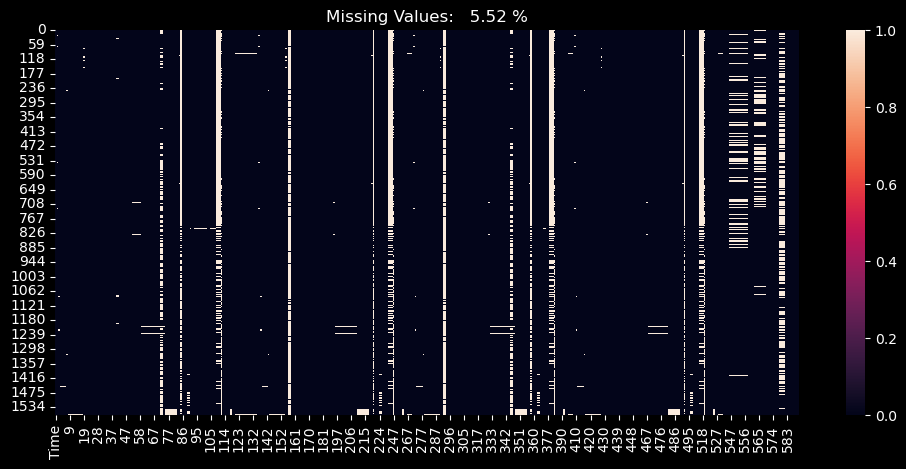

In [87]:
# Missing Value(NA) 확인
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])

fig, ax = plt.subplots(figsize = (12, 5))
ax.set_title(f'Missing Values:   {df.isnull().sum().sum() / (len(df) * len(df.columns)) * 100:.2f} %')
sns.heatmap(df.isnull(), ax = ax);

In [88]:
# Most Missing Features 제거
miss_series = df.isnull().sum() / len(df)
miss_series.sort_values(ascending = False).head(10)

158    0.911934
157    0.911934
292    0.911934
293    0.911934
220    0.855775
358    0.855775
492    0.855775
85     0.855775
244    0.649649
382    0.649649
dtype: float64

In [89]:
# 10% 이상의 na값 삭제
miss_series[miss_series>0.1].index

Index(['72', '73', '85', '109', '110', '111', '112', '157', '158', '220',
       '244', '245', '246', '247', '292', '293', '345', '346', '358', '382',
       '383', '384', '385', '492', '516', '517', '518', '519', '546', '547',
       '548', '549', '550', '551', '552', '553', '554', '555', '556', '557',
       '562', '563', '564', '565', '566', '567', '568', '569', '578', '579',
       '580', '581'],
      dtype='object')

In [90]:
# 다시 결과 비교
print("before:", len(df.columns))
df = df.drop(miss_series[miss_series>0.1].index, axis=1)
print("after:", len(df.columns))

before: 476
after: 424


In [91]:
# 나머지 변수에 대한 na값 처리
from sklearn.impute import KNNImputer

# KNNImputer 객체 생성
imputer = KNNImputer()

df_filled =imputer.fit_transform(df.iloc[:,1:-1])

df_filled = pd.DataFrame(df_filled, columns=df.iloc[:,1:-1].columns)
df = pd.concat([df[['Time', 'Pass/Fail']], df_filled], axis=1)
print("na 값 total sum:",df.isnull().sum().sum())

na 값 total sum: 0


In [92]:
# Class가 -1과 1로 이루어져있음을 알 수 있음
df['Pass/Fail'].value_counts(dropna=False)

Pass/Fail
-1    1463
 1     104
Name: count, dtype: int64

In [93]:
# Class Data 변환
import numpy as np
df['Pass/Fail'] = np.where(df['Pass/Fail']==1, 1, 0)
df['Pass/Fail'].value_counts(dropna=False)

Pass/Fail
0    1463
1     104
Name: count, dtype: int64

In [94]:
# 이상치(outlier) 확인
df.describe()

,Pass/Fail,0,1,2,3,4,6,7,8,9,...,576,577,582,583,584,585,586,587,588,589
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,0.066369,3014.291238,2495.829953,2200.609920,1396.628057,4.171235,101.100868,0.121666,1.462857,-0.000843,...,5.563747,16.642363,0.500097,0.015316,0.003846,3.067398,0.021457,0.016472,0.005283,99.648308
std,0.249005,73.548522,80.235292,29.403399,440.715863,56.103726,6.219141,0.009938,0.073851,0.015108,...,16.921369,12.485267,0.003403,0.017175,0.003719,3.576931,0.012354,0.008805,0.002866,93.865888
min,0.000000,2743.240000,2158.750000,2060.660000,0.000000,0.681500,82.131100,0.000000,1.191000,-0.053400,...,0.663600,4.582000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000
25%,0.000000,2965.965000,2452.885000,2181.099950,1083.393700,1.017700,97.920000,0.121100,1.411250,-0.010800,...,1.408450,11.501550,0.497900,0.011600,0.003100,2.306500,0.013450,0.010600,0.003300,44.368600
50%,0.000000,3011.270000,2499.350000,2201.066700,1285.214400,1.316800,101.512200,0.122400,1.461600,-0.001300,...,1.624500,13.817900,0.500200,0.013800,0.003600,2.757600,0.020500,0.014800,0.004600,71.778000
75%,0.000000,3056.540000,2538.745000,2218.055500,1591.223500,1.525700,104.558350,0.123800,1.516850,0.008400,...,1.902000,17.080900,0.502350,0.016500,0.004100,3.294950,0.027600,0.020300,0.006400,114.749700
max,1.000000,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,129.252200,0.128600,1.656400,0.074900,...,90.423500,96.960100,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800


In [95]:
# 변수가 많기 때문에, Dataframe 변경을 통한 min 값 음수 확인
pd.DataFrame(df.describe())

,Pass/Fail,0,1,2,3,4,6,7,8,9,...,576,577,582,583,584,585,586,587,588,589
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,0.066369,3014.291238,2495.829953,2200.609920,1396.628057,4.171235,101.100868,0.121666,1.462857,-0.000843,...,5.563747,16.642363,0.500097,0.015316,0.003846,3.067398,0.021457,0.016472,0.005283,99.648308
std,0.249005,73.548522,80.235292,29.403399,440.715863,56.103726,6.219141,0.009938,0.073851,0.015108,...,16.921369,12.485267,0.003403,0.017175,0.003719,3.576931,0.012354,0.008805,0.002866,93.865888
min,0.000000,2743.240000,2158.750000,2060.660000,0.000000,0.681500,82.131100,0.000000,1.191000,-0.053400,...,0.663600,4.582000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000
25%,0.000000,2965.965000,2452.885000,2181.099950,1083.393700,1.017700,97.920000,0.121100,1.411250,-0.010800,...,1.408450,11.501550,0.497900,0.011600,0.003100,2.306500,0.013450,0.010600,0.003300,44.368600
50%,0.000000,3011.270000,2499.350000,2201.066700,1285.214400,1.316800,101.512200,0.122400,1.461600,-0.001300,...,1.624500,13.817900,0.500200,0.013800,0.003600,2.757600,0.020500,0.014800,0.004600,71.778000
75%,0.000000,3056.540000,2538.745000,2218.055500,1591.223500,1.525700,104.558350,0.123800,1.516850,0.008400,...,1.902000,17.080900,0.502350,0.016500,0.004100,3.294950,0.027600,0.020300,0.006400,114.749700
max,1.000000,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,129.252200,0.128600,1.656400,0.074900,...,90.423500,96.960100,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800


In [96]:
# 변수가 많기 때문에, Dataframe 변경을 통한 min 값 음수 확인
df_desc = df.describe().loc['min']
df_desc[df_desc<0].index

Index(['9', '10', '21', '23', '24', '41', '59', '75', '76', '77', '78', '79',
       '80', '81', '82', '91', '92', '93', '94', '95', '96', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '129', '586'],
      dtype='object')

In [97]:
# min 값 음수(-) 값 확인
df[df_desc[df_desc<0].index].head()

,9,10,21,23,24,41,59,75,76,77,...,101,102,103,104,105,106,107,108,129,586
0,0.0162,-0.0034,-5419.00,-4043.75,751.00,4.515,-1.7264,0.0126,-0.0206,0.0141,...,0.0002,0.1350,-0.0042,0.0003,0.0056,0.0000,-0.2468,0.3196,-0.0473,0.01942
1,-0.0005,-0.0148,-5441.50,-3498.75,-1640.25,2.773,0.8073,-0.0039,-0.0198,0.0004,...,-0.0004,-0.0752,-0.0045,0.0002,0.0015,0.0000,0.0772,-0.0903,-0.0946,0.00960
2,0.0041,0.0013,-5447.75,-4047.00,-1916.50,5.434,23.8245,-0.0078,-0.0326,-0.0052,...,-0.0001,0.0134,-0.0026,-0.0016,-0.0006,0.0013,-0.0301,-0.0728,-0.1892,0.05840
3,-0.0124,-0.0033,-5468.25,-4515.00,-1657.25,1.279,24.3791,-0.0555,-0.0461,-0.0400,...,0.0000,-0.0699,-0.0059,0.0003,0.0003,0.0021,-0.0483,-0.1180,0.2838,0.02020
4,-0.0031,-0.0072,-5476.25,-3987.50,117.00,2.209,-12.2945,-0.0534,0.0183,-0.0167,...,-0.0003,0.0696,-0.0045,0.0002,0.0078,0.0000,-0.0799,-0.2038,-0.5677,0.02020


In [98]:
# 중복데이터 확인
df[df.duplicated()]

,Time,Pass/Fail,0,1,2,3,4,6,7,8,...,576,577,582,583,584,585,586,587,588,589


In [99]:
# 최종 데이터 확정
df.shape

(1567, 424)

### **3) Data Readiness Check**

In [100]:
df.head()

,Time,Pass/Fail,0,1,2,3,4,6,7,8,...,576,577,582,583,584,585,586,587,588,589
0,2008-07-19 11:55:00,0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,...,1.6765,14.9509,0.5005,0.0118,0.0035,2.3630,0.01942,0.01266,0.00438,65.5742
1,2008-07-19 12:32:00,0,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,...,1.1065,10.9003,0.5019,0.0223,0.0055,4.4447,0.00960,0.02010,0.00600,208.2045
2,2008-07-19 13:17:00,1,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,...,2.0952,9.2721,0.4958,0.0157,0.0039,3.1745,0.05840,0.04840,0.01480,82.8602
3,2008-07-19 14:43:00,0,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,...,1.7585,8.5831,0.4990,0.0103,0.0025,2.0544,0.02020,0.01490,0.00440,73.8432
4,2008-07-19 15:22:00,0,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,...,1.6597,10.9698,0.4800,0.4766,0.1045,99.3032,0.02020,0.01490,0.00440,73.8432


In [101]:
df['Pass/Fail'].value_counts(normalize=True)

Pass/Fail
0    0.933631
1    0.066369
Name: proportion, dtype: float64

In [102]:
# Normal vs Abnormal 측정값 평균 비교, 현재 가진 데이터로 분류가 가능한지 가늠
df_normal = df[df['Pass/Fail']==0]
df_abnormal = df[df['Pass/Fail']==1]

df_normal_mean = pd.DataFrame(df_normal.describe()).loc['mean']
df_abnormal_mean = pd.DataFrame(df_abnormal.describe()).loc['mean']

In [103]:
# Normal vs Abnormal 측정값 평균 비교, 현재 가진 데이터로 분류가 가능한지 가늠
# 더 정확한 비교를 위해서는 표준화 필요
df_concat = pd.concat([df_normal_mean, df_abnormal_mean], axis=1, keys=['normal', 'abnormal'])
df_concat['gap'] = abs(df_concat['normal'] - df_concat['abnormal'])
df_concat.head()

,normal,abnormal,gap
Pass/Fail,0.000000,1.000000,1.000000
0,3014.772139,3007.526250,7.245889
1,2495.871671,2495.243096,0.628574
2,2200.621865,2200.441877,0.179988
3,1399.531713,1355.781435,43.750278


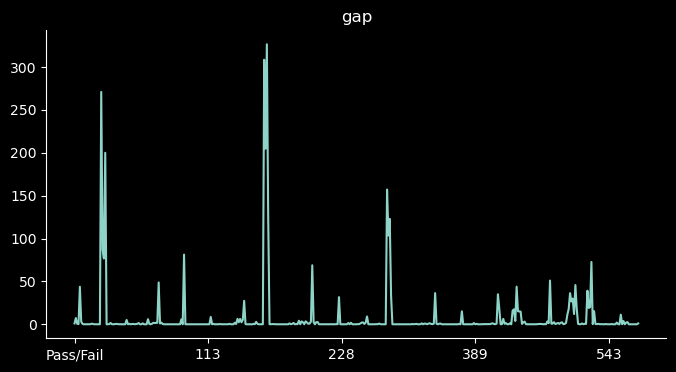

In [104]:
# Gap이 천차만별
from matplotlib import pyplot as plt
df_concat['gap'].plot(kind='line', figsize=(8, 4), title='gap')
plt.gca().spines[['top', 'right']].set_visible(False)

/Users/yunjh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

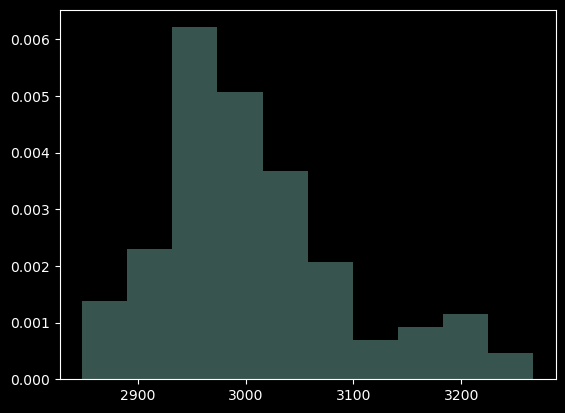

In [105]:
# ▶ distplot을 통해 정상/비정상 분포 비교
sns.distplot(df[df['Pass/Fail']==1]['0'], label = 'abnormal')
sns.distplot(df[df['Pass/Fail']==0]['0'], label = 'normal')
plt.legend()

### (1) Data Standardization

In [107]:
# 날짜 및 시간 형식을 to datetime함수를 이용해서 datatime 객체로 변환함
df['Time'] = pd.to_datetime(df['Time'])
df['Time']

0      2008-07-19 11:55:00
1      2008-07-19 12:32:00
2      2008-07-19 13:17:00
3      2008-07-19 14:43:00
4      2008-07-19 15:22:00
5      2008-07-19 17:53:00
6      2008-07-19 19:44:00
7      2008-07-19 19:45:00
8      2008-07-19 20:24:00
9      2008-07-19 21:35:00
10     2008-07-19 21:57:00
11     2008-07-19 22:52:00
12     2008-07-20 03:35:00
13     2008-07-21 08:21:00
14     2008-07-21 11:53:00
15     2008-07-22 00:03:00
16     2008-07-22 02:59:00
17     2008-07-22 08:41:00
18     2008-07-22 11:47:00
19     2008-07-22 14:00:00
20     2008-07-22 15:30:00
21     2008-07-23 05:15:00
22     2008-07-23 19:22:00
23     2008-07-25 15:23:00
24     2008-07-27 04:18:00
25     2008-07-27 09:37:00
26     2008-07-27 11:10:00
27     2008-07-27 15:46:00
28     2008-07-27 16:06:00
29     2008-07-27 16:49:00
30     2008-07-27 20:24:00
31     2008-07-27 22:28:00
32     2008-07-27 22:28:00
33     2008-07-27 23:14:00
34     2008-07-28 03:31:00
35     2008-07-28 03:48:00
36     2008-07-28 04:37:00
3

In [111]:
# ▶ 표준화 진행
from sklearn.preprocessing import StandardScaler

X= df.drop(['Time', 'Pass/Fail'], axis=1)
Y= df['Pass/Fail']

# ▶ 표준화
X_ = StandardScaler().fit_transform(X)

# ▶ DataFrame을 변환
df_s = pd.concat([pd.DataFrame(X_, columns=X.columns), pd.DataFrame(Y, columns=['Pass/Fail'])], axis=1)
df_s.head()

,0,1,2,3,4,6,7,8,9,10,...,583,584,585,586,587,588,589,scaled_Pass/Fail,scaled_time,Pass/Fail
0,0.226301,0.849898,-0.438069,0.032908,-0.050120,-0.560959,0.255040,0.509872,1.128455,-0.381082,...,-0.204765,-0.093106,-0.196991,-0.164944,-0.433115,-0.315062,-0.363124,-0.266621,-0.140386,0
1,1.108313,-0.382622,1.014230,0.152148,-0.059584,0.199839,0.305366,0.457047,0.022693,-1.607666,...,0.406796,0.444803,0.385174,-0.960061,0.412105,0.250318,1.156872,-0.266621,-0.140070,0
2,-1.110931,0.799281,-0.483051,0.684081,-0.047446,-0.902835,0.244975,-0.260840,0.327275,0.124615,...,0.022386,0.014476,0.029952,2.991230,3.627123,3.321515,-0.178909,3.750641,-0.139685,1
3,-0.347789,-0.198604,-0.053637,-1.105000,-0.050830,0.504384,0.003412,0.343268,-0.765245,-0.370322,...,-0.292131,-0.362061,-0.283293,-0.101789,-0.178640,-0.308082,-0.275002,-0.266621,-0.138950,0
4,0.244118,0.087771,1.114403,-0.159128,-0.047032,-0.113262,0.184584,0.545089,-0.149461,-0.789943,...,26.867038,27.071310,26.913163,-0.101789,-0.178640,-0.308082,-0.275002,-0.266621,-0.138617,0


In [112]:
# Normal vs Abnormal 측정값 평균 비교, 현재 가진 데이터로 분류가 가능한지 가늠 (표준화)
df_s_normal = df_s[df_s['Pass/Fail']==0]
df_s_abnormal = df_s[df_s['Pass/Fail']==1]

df_s_normal_mean = pd.DataFrame(df_s_normal.describe()).loc['mean']
df_s_abnormal_mean = pd.DataFrame(df_s_abnormal.describe()).loc['mean']

# Normal vs Abnormal 측정값 평균 비교, 현재 가진 데이터로 분류가 가능한지 가늠 (표준화)
df_concat = pd.concat([df_s_normal_mean, df_s_abnormal_mean], axis=1, keys=['normal', 'abnormal'])
df_concat['gap'] = abs(df_concat['normal'] - df_concat['abnormal'])
df_concat.head()

,normal,abnormal,gap
0,0.006541,-0.092009,0.098550
1,0.000520,-0.007317,0.007837
2,0.000406,-0.005717,0.006123
3,0.006591,-0.092712,0.099303
4,0.003635,-0.051133,0.054768


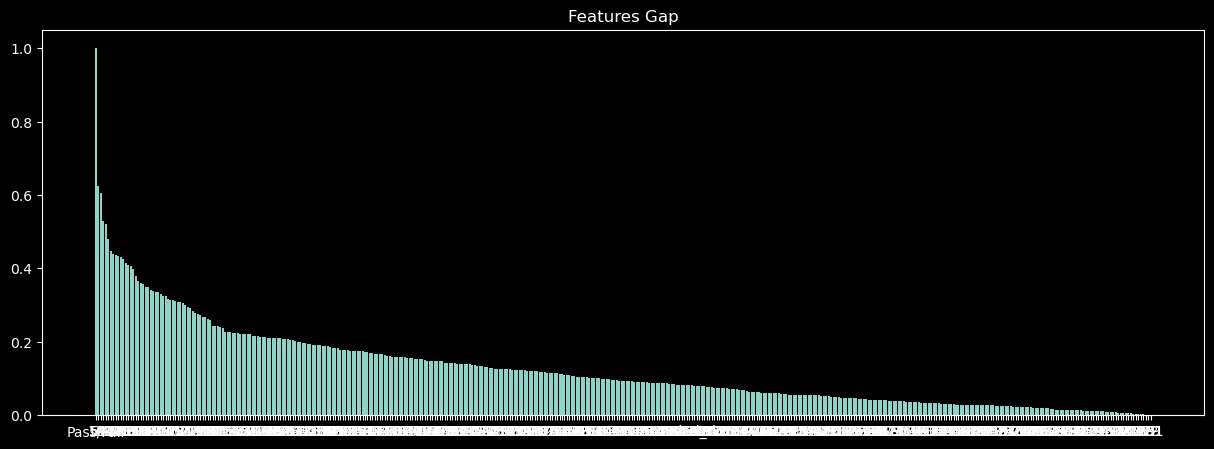

In [113]:
# Plot
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['dark_background'])

df_top10 = df_concat.sort_values(by=['gap'], ascending=False).iloc[1:,:]

df_top10 = df_top10.sort_values(by=['gap'], ascending=False) # default 욥션
fig = plt.figure(figsize=(15,5));
plt.title('Features Gap');
plt.bar(df_top10.index, df_top10['gap']);

### (2) Feature Engineering

In [114]:
# 다중공선성을 제거하기 위해, 상관계수가 0.8이상인 데이터 쌍 중 하나를 제거
from feature_engine.selection import DropConstantFeatures, SmartCorrelatedSelection

print("before:", len(df.columns))
df = SmartCorrelatedSelection(threshold=0.8, selection_method='variance').fit_transform(df)
print("after:", len(df.columns))

before: 426
after: 218


### **4) 모델링**

In [115]:
df.head()

,Time,0,1,2,3,6,7,8,9,10,...,571,572,573,582,585,586,587,589,scaled_Pass/Fail,scaled_time
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,97.6133,0.1242,1.5005,0.0162,-0.0034,...,2.1113,8.95,0.3157,0.5005,2.3630,0.01942,0.01266,65.5742,0.0,-0.468395
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,102.3433,0.1247,1.4966,-0.0005,-0.0148,...,2.4335,5.92,0.2653,0.5019,4.4447,0.00960,0.02010,208.2045,0.0,-0.468052
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,95.4878,0.1241,1.4436,0.0041,0.0013,...,2.0293,11.21,0.1882,0.4958,3.1745,0.05840,0.04840,82.8602,1.0,-0.467634
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,104.2367,0.1217,1.4882,-0.0124,-0.0033,...,2.0253,9.33,0.1738,0.4990,2.0544,0.02020,0.01490,73.8432,0.0,-0.466836
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,100.3967,0.1235,1.5031,-0.0031,-0.0072,...,2.0275,8.83,0.2224,0.4800,99.3032,0.02020,0.01490,73.8432,0.0,-0.466474


In [133]:
df.corr()

,Time,0,1,2,3,6,7,8,9,10,11,12,14,15,17,18,20,21,22,23,24,27,28,29,31,32,33,35,36,37,38,39,40,41,43,44,46,47,48,51,54,55,56,57,58,59,61,62,63,65,68,70,71,75,76,77,78,79,80,81,82,83,84,86,87,88,89,90,91,92,93,95,98,99,100,102,103,107,108,113,115,116,118,120,122,124,125,126,128,129,131,132,133,134,135,136,137,138,139,140,145,146,150,151,152,159,160,161,162,167,168,177,180,182,183,187,188,200,203,204,210,211,212,213,214,215,216,217,223,225,227,228,238,239,249,250,252,268,335,337,344,367,368,415,416,417,418,419,423,426,428,429,432,433,436,437,438,439,440,441,442,443,444,446,447,453,456,460,467,468,470,472,473,474,476,478,480,482,483,484,485,486,487,488,489,490,491,493,494,496,499,500,510,511,520,521,523,525,526,527,539,541,542,544,545,558,561,570,571,572,573,582,585,586,587,589,scaled_Pass/Fail,scaled_time
Time,1.000000,0.008774,-0.020511,-0.038451,0.201952,-0.175826,-0.066405,-0.079898,0.159061,-0.104268,-0.038860,-0.040762,-0.087990,0.013204,0.041198,-0.062944,0.069589,0.037197,-0.041837,-0.013568,-0.052414,0.081155,0.174774,-0.128377,-0.092111,-0.048576,-0.060278,0.054402,-0.014998,-0.111062,-0.021717,0.020999,0.033919,-0.001998,-0.110038,0.144388,-0.094521,0.030196,0.034234,-0.052887,-0.040596,-0.096866,0.023508,-0.045140,0.179018,-0.072972,0.060759,-0.040528,-0.059164,-0.009021,0.151912,-0.043039,0.117159,0.116985,0.274365,0.011460,0.139615,-0.032997,-0.002939,0.080579,0.001033,0.004259,-0.028453,0.003532,0.011322,0.015194,0.036054,0.017220,0.054276,-0.039750,-0.009794,-0.103207,-0.009126,-0.020302,-0.105761,-0.095076,-0.210353,0.082940,0.004557,0.015264,0.030011,-0.001518,0.057593,0.012038,0.208126,-0.346518,0.342880,-0.102990,0.013875,-0.356679,-0.006644,0.087571,-0.074599,-0.008854,0.004947,0.005892,-0.061485,-0.046212,0.102894,0.001694,-0.054088,-0.059728,-0.042088,0.058698,0.008895,-0.008044,-0.024529,0.011752,0.071813,0.059616,0.053974,-0.068576,0.086685,-0.095762,0.084260,0.047073,-0.019383,-0.008437,0.029569,-0.003569,-0.012618,0.006996,-0.047888,-0.050255,-0.008222,-0.110442,0.062139,-0.059027,0.017546,-0.035947,-0.029866,5.258539e-03,-0.027321,0.083797,0.024078,-0.013441,0.019567,-0.329689,-0.014461,-0.044048,0.011265,-0.000482,0.000897,-0.006357,-0.108790,0.034532,-0.032274,0.048900,0.027853,-0.080077,-0.042582,-0.043992,0.017444,0.040343,-0.007645,1.684653e-02,0.070732,0.068260,0.039321,0.080524,-0.020358,-0.025246,-0.058719,0.160152,0.036866,0.009639,0.042987,0.068164,-0.074218,0.026826,-0.056446,0.077425,-0.044634,0.001598,-0.104821,0.031844,-0.087449,-0.011009,0.146112,-0.056894,-0.047046,0.022591,-0.012590,-0.005724,-0.047609,-0.048500,-0.021353,0.030876,0.002121,-0.043409,-0.008650,0.016465,-0.092712,-0.022056,0.024134,0.051745,-0.027188,-0.027684,-0.053374,-0.081784,0.343842,0.011669,0.170366,-0.151113,-0.010611,0.021482,0.080948,-0.000889,0.133202,-0.046971,0.012221,-0.005319,0.009003,0.044262,0.004658,0.023340,-0.020068,1.000000
0,0.008774,1.000000,-0.147187,0.003701,-0.006121,0.002147,0.030875,-0.054418,0.009334,0.006600,0.044063,0.011309,-0.008993,0.030960,0.013511,0.018584,0.026373,-0.011555,0.032335,-0.046086,-0.017065,0.106516,0.057270,-0.030501,-0.056086,-0.004458,-0.033909,-0.004151,0.017239,-0.035264,-0.043804,-0.034568,-0.002967,0.040501,-0.050886,0.055222,-0.007080,-0.038436,0.004746,-0.051900,0.023031,-0.025962,0.015129,-0.022647,-0.011607,-0.106645,0.034619,0.007020,-0.044686,-0.018897,0.034468,-0.002357,0.002471,0.083726,0.024192,0.022713,0.073073,-0.119324,0.008641,0.038650,0.036830,0.006208,0.054007,-0.018296,0.050478,-0.029735,-0.010063,0.012202,0.013648,-0.010704,0.004732,-0.037844,-0.034392,-0.059375,0.031373,-0.046056,-0.072660,-0.004173,-0.018315,0.016508,0.023120,0.057760,-0.013368,0.005301,0.000320,-0.028639,0.032258,-0.025160,-0.050705,-0.068838,0.025341,0.028722,-0.006626,0.011850,-0.070368,0.156902,0.161827,-0.021141,0.001468,-0.010800,-0.021983,-0.031374,0.005994,-0.013773,0.003617,-0.038265,-0.002974,0.014446,0.062219,0.029910,0.015116,-0.043369,-0.001349,0.030199,-0.021932,-0.01

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

# training과 testing 세트나누기
X = df.drop(['Time', 'scaled_Pass/Fail'], axis=1)
Y = df['scaled_Pass/Fail']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [121]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

In [127]:
# logistic regression model
logreg = LogisticRegression()
logreg.fit(x_train_sc, y_train)

# test 결과
y_pred = logreg.predict(x_train_sc)

In [131]:
from sklearn.metrics import classification_report

# 예측 및 성능 확인
y_pred_train = logreg.predict(x_train_sc)
y_pred_test = logreg.predict(x_test_sc)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1170
         1.0       0.91      0.58      0.71        83

    accuracy                           0.97      1253
   macro avg       0.94      0.79      0.84      1253
weighted avg       0.97      0.97      0.96      1253

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93       293
         1.0       0.13      0.14      0.14        21

    accuracy                           0.88       314
   macro avg       0.53      0.54      0.54       314
weighted avg       0.88      0.88      0.88       314



In [135]:
# 특정 변수들만 추출하여 분석

from sklearn.model_selection import train_test_split

X = df[['59','103','510']]
Y = df['scaled_Pass/Fail']

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(1253, 3)
(1253,)
(314, 3)
(314,)


In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

# 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression()
model.fit(x_train, y_train)

# 테스트 데이터 예측
y_pred = model.predict(x_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.9299363057324841

Confusion Matrix:
 [[292   0]
 [ 22   0]]


In [137]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

In [138]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 42)
rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix )

Accuracy: 0.9235668789808917
Confusion Matrix:
 [[288   4]
 [ 20   2]]


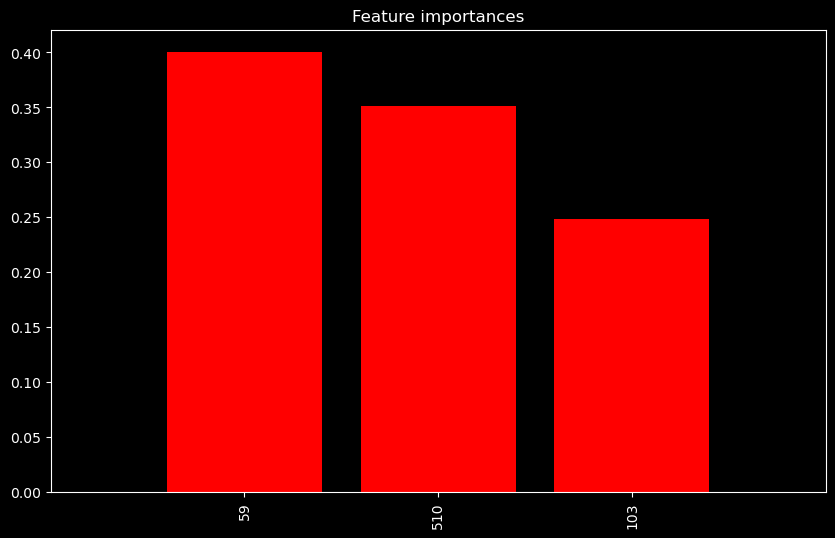

In [141]:
import numpy as np
import matplotlib.pyplot as plt

importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
X = df[['59','103','510']]
features = X.columns

plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

## **3. 결론**

---

> **결론 및 향후계획**

```
* 추가적으로 상관관계 분석을 통해 합격/불합격 변수와 강한 상관관계 분석을 하였으며,
그 중에서 59, 103, 510 변수가 그러한 관계를 가졌음.
이를 기반으로 로지스틱회귀와 랜덤포레스트 분석을 하였으며, 모델에서 가장 중요한 변수가
59, 510, 103 순인 것을 알수 있었음.
* 향후 수욜 유형의 핵심 신호로 나타난 59, 510, 103를 이용해 반도체 제조 공정 효율성을 높이기 위한 작업을 진행해야함.

```

> **기대효과**

```
* 반도체 제조과정의 품질을 기존보다 20% 이상 향상
* 반도체 제조 공정 효율성이 높아짐과 동시에 품질도 향상되면서 소문을 들은 신규고객이 이전보다 30% 증가함.
* 신규 고객 증가로 월 수익이 5억 증가함.
```